Kerakli kutubxonalarni chaqiramiz

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import torch
import fastai

from fastai.vision.all import *
from ipywidgets import widgets

Datasetni yuklash

In [2]:
# path
path = Path('/kaggle/input/pnevmoniya/train')

path.ls()

(#2) [Path('/kaggle/input/pnevmoniya/train/PNEUMONIA'),Path('/kaggle/input/pnevmoniya/train/NORMAL')]

In [3]:
# datablock yaratish

pnevmoniya = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#DataLoader Yaratish

dls = pnevmoniya.dataloaders(path)

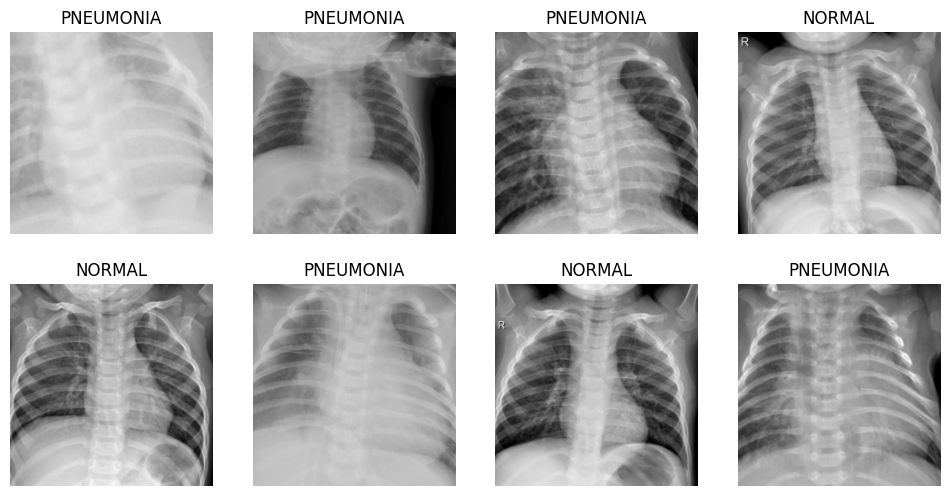

In [4]:
# datasetni tekshirish

dls.train.show_batch(max_n=8, nrows=2)

Train

In [5]:
#training

learn = vision_learner(dls, resnet34, metrics=accuracy)

learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 121MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,0.480227,0.213946,0.936721,01:15


epoch,train_loss,valid_loss,accuracy,time
0,0.150955,0.103224,0.973154,01:18
1,0.092013,0.065188,0.980825,01:19
2,0.049147,0.059765,0.981783,01:19
3,0.024776,0.054662,0.981783,01:19


confusion_matrix

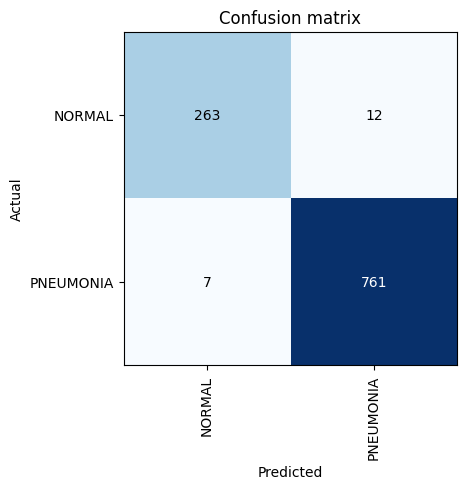

In [6]:
# tekshirish

interpre = ClassificationInterpretation.from_learner(learn)

interpre.plot_confusion_matrix()

In [7]:
interpre.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.97      0.96      0.97       275
   PNEUMONIA       0.98      0.99      0.99       768

    accuracy                           0.98      1043
   macro avg       0.98      0.97      0.98      1043
weighted avg       0.98      0.98      0.98      1043



Solution file

In [8]:
sample_data = pd.read_csv('/kaggle/input/pnevmoniya/sample_solution.csv')

sample_data['labels'] = [np.array(learn.predict(PILImage.create(Path(f"/kaggle/input/pnevmoniya/test/{sample_data.loc[x, 'id']}")))[2][1]) for x in range(len(sample_data))]

sample_data.to_csv('solution.csv', index=False)